In [ ]:
!pip install conllu estnltk==1.6.7b0
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Regular.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Light.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-SemiBold.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Bold.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

Abifunktsioon jooniste tegemiseks

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mpl.font_manager._rebuild()
mpl.rc('figure', figsize=(12, 5))

def plot_data(year, result, header):
  plt.rc('font', family='Open Sans')
  fig, ax = plt.subplots()

  # Save the chart so we can loop through the bars below.
  bars = ax.bar(
      x=[occurances[0] for occurances in result],
      height=[occurances[1] for occurances in result]
  )

  # Axis formatting.
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)

  # Add text annotations to the top of the bars.
  bar_color = bars[0].get_facecolor()
  for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.3,
        round(bar.get_height(), 1),
        horizontalalignment='center',
        color=bar_color,
        weight='bold'
    )

  # Add labels and a title.
  ax.set_xlabel('Enim kasutatavad sõnad', labelpad=15, color='#333333')
  ax.set_ylabel('Sõnade esinemiste arv', labelpad=15, color='#333333')
  ax.set_title(f'{header} [{year}]', pad=15, color='#333333',
              weight='bold')

  fig.tight_layout()

INFO:font_manager.py:1337: generated new fontManager


Esmalt loeb failid listi ning viib nad paremini käideltatavale kujule

In [2]:
from estnltk import Text
from html import unescape
import re

sample_data = [
    ("1890", "1890.txt"),
    ("1930", "1930.txt"),
    ("1950", "1950.txt"),
    ("1990", "1999.txt")
]

# encoding is cp1257 - aka windows1257 because I copied the files to here with that encoding
def formatted_data(filename):
  return unescape(re.sub("\S+\\\\\S+\s", "", open(filename, "r", encoding="cp1257").read()))

texts = [
    (
      year, 
      Text(formatted_data(filename))
        .tag_layer("words")
        .tag_layer("morph_analysis")
    ) for year, filename in sample_data
]

global_total_occurences = 0
global_guessed_right = 0

def get_percentage(text):
  global global_total_occurences
  global global_guessed_right
  total_occurences = 0
  guessed_right = 0
  for item in text.morph_analysis:
    if re.match(r".+[bB]$", item.text):
      global_total_occurences += 1
      total_occurences += 1
      if "V" in item.partofspeech:
        global_guessed_right += 1
        guessed_right += 1
      
  return round(100 * (guessed_right / total_occurences), 2)

[print(f"Aastal {year} oli {get_percentage(text)}% b-tähega lõppevad sõnad verbid.") for year, text in texts]
print(f"Aastate peale keskmiselt olid {round(100 * (global_guessed_right / global_total_occurences), 2)}% b-tähega lõppevad sõnad verbid.")

Aastal 1890 oli 83.08% b-tähega lõppevad sõnad verbid.
Aastal 1930 oli 90.47% b-tähega lõppevad sõnad verbid.
Aastal 1950 oli 99.32% b-tähega lõppevad sõnad verbid.
Aastal 1990 oli 98.4% b-tähega lõppevad sõnad verbid.
Aastate peale keskmiselt olid 95.24% b-tähega lõppevad sõnad verbid.


Huvitav, miks 1890 ning 1930 on need protsendid nii madala. Moodustab listi sõnadest ning nende kordustest, mis pole verbid. Vastavad 17% ning 12.5% siis

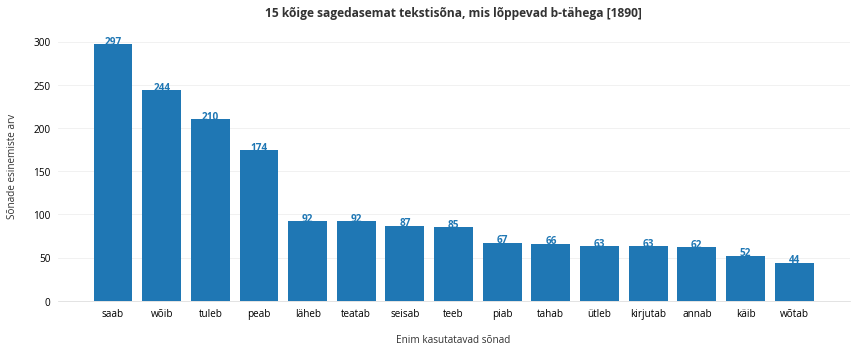

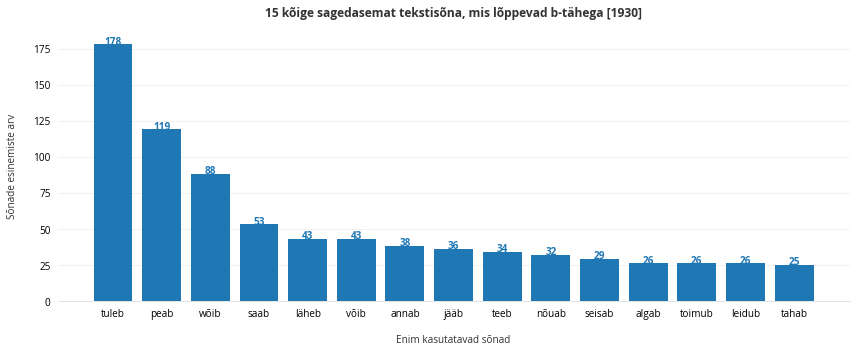

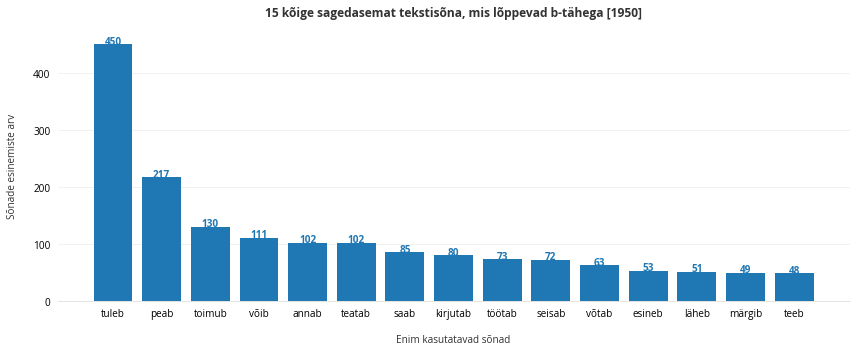

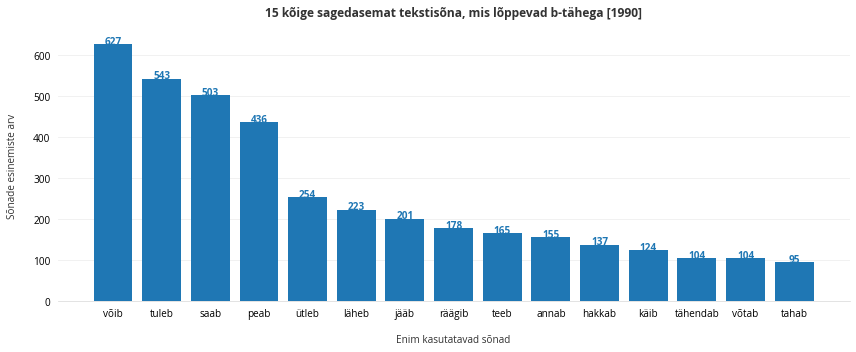

In [9]:
Iga faili kohta moodusta b-lõpuliste sõnade 15 kõige sagedasemat tekstisõna


Verbid, mis lõppevad b-tähega

In [10]:
global_total_occurences = 0
global_guessed_right = 0

def get_percentage(text):
  global global_total_occurences
  global global_guessed_right
  total_occurences = 0
  guessed_right = 0
  for item in text.morph_analysis:
    if "V" in item.partofspeech:
      global_total_occurences += 1
      total_occurences += 1
      if re.match(r".+[bB]$", item.text):
        global_guessed_right += 1
        guessed_right += 1
      
  return round(100 * (guessed_right / total_occurences), 2)

[print(f"Aastal {year} oli {get_percentage(text)}% verbid b-tähega lõppevad.") for year, text in texts]
print(f"Aastate peale keskmiselt olid {round(100 * (global_guessed_right / global_total_occurences), 2)}% verbid b-tähega lõppevad.")

Aastal 1890 oli 9.77% verbid b-tähega lõppevad.
Aastal 1930 oli 11.66% verbid b-tähega lõppevad.
Aastal 1950 oli 12.58% verbid b-tähega lõppevad.
Aastal 1990 oli 14.24% verbid b-tähega lõppevad.
Aastate peale keskmiselt olid 12.74% verbid b-tähega lõppevad.


Hinnang:

Lõppkokkuvõteks ilmnes, et vanad eesti sõnad, nagu `wõib`, `piab`, `wõtab`, `arwab`, `jäeb`, `kaswab`, ... ei ole `estnltk` library arust verbid. Mida oli ka arvata, kuna library on kohandatud ikka kõige viimase keele jaoks.

Aga kui keele muutus toimus, mille jaoks ka `estnltk` seadistatud on - ~99% b-tähega sõnadest on verbid. Aga vähesed verbid lõppevad b tähega, kuna käänded eksisteerivad.

Lõppkokkuvõtteks on keeleteadlased oletuse imelikult püstitanud. Kuna suure osa verbe EI saa tuvastada tekstist sõnalõpu järgi, kuna ~90% verbidest ei lõppe b-tähega. AGA kui püstitada oletus nii, et suur osa b-tähega lõppevad sõnad on verbid - see on juba parem oletus.
